<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.521374,46.126349,91.795583,0.098960,179.542266,179.445519,0.096747
1,0.0,1.0,43.597104,55.641060,37.060362,-0.041140,146.257386,146.268841,-0.011455
2,0.0,2.0,42.245771,28.009417,91.008599,0.224371,171.488159,171.256943,0.231216
3,0.0,3.0,82.741437,83.578675,66.090213,0.042533,242.452857,242.413645,0.039212
4,0.0,4.0,60.942767,32.624857,29.068411,0.101497,132.737532,132.590207,0.147324
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,21.538788,36.852793,48.001877,0.107841,116.501298,116.400611,0.100687
119996,999.0,116.0,82.625377,77.975401,96.724699,-0.026293,267.299185,267.343219,-0.044034
119997,999.0,117.0,28.230981,39.797525,35.693798,0.068947,113.791251,113.721962,0.069289
119998,999.0,118.0,78.054750,96.061103,22.416001,0.094073,206.625928,206.517139,0.108788


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.521374,46.126349,91.795583,0.098960,179.542266,179.445519,0.096747
1,0.0,1.0,43.597104,55.641060,37.060362,-0.041140,146.257386,146.268841,-0.011455
2,0.0,2.0,42.245771,28.009417,91.008599,0.224371,171.488159,171.256943,0.231216
3,0.0,3.0,82.741437,83.578675,66.090213,0.042533,242.452857,242.413645,0.039212
4,0.0,4.0,60.942767,32.624857,29.068411,0.101497,132.737532,132.590207,0.147324
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,21.538788,36.852793,48.001877,0.107841,116.501298,116.400611,0.100687
119996,999.0,116.0,82.625377,77.975401,96.724699,-0.026293,267.299185,267.343219,-0.044034
119997,999.0,117.0,28.230981,39.797525,35.693798,0.068947,113.791251,113.721962,0.069289
119998,999.0,118.0,78.054750,96.061103,22.416001,0.094073,206.625928,206.517139,0.108788


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.521374,46.126349,91.795583,0.098960,179.542266,179.445519,0.096747
1,0.0,1.0,43.597104,55.641060,37.060362,-0.041140,146.257386,146.268841,-0.011455
2,0.0,2.0,42.245771,28.009417,91.008599,0.224371,171.488159,171.256943,0.231216
3,0.0,3.0,82.741437,83.578675,66.090213,0.042533,242.452857,242.413645,0.039212
4,0.0,4.0,60.942767,32.624857,29.068411,0.101497,132.737532,132.590207,0.147324
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,21.538788,36.852793,48.001877,0.107841,116.501298,116.400611,0.100687
119996,999.0,116.0,82.625377,77.975401,96.724699,-0.026293,267.299185,267.343219,-0.044034
119997,999.0,117.0,28.230981,39.797525,35.693798,0.068947,113.791251,113.721962,0.069289
119998,999.0,118.0,78.054750,96.061103,22.416001,0.094073,206.625928,206.517139,0.108788


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

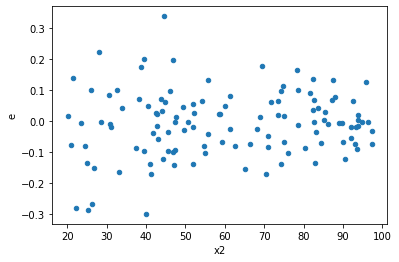

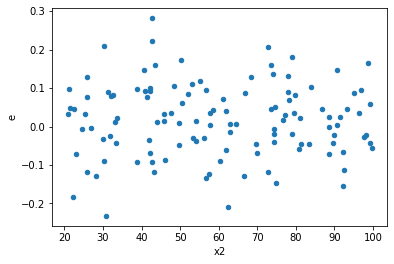

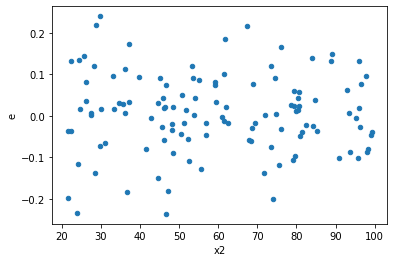

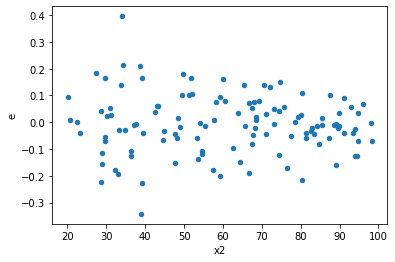

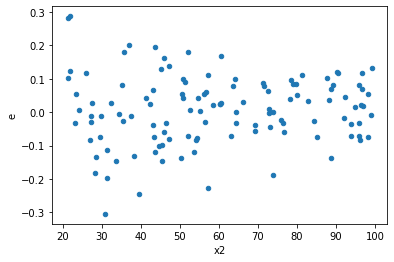

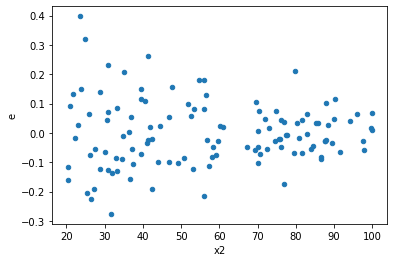

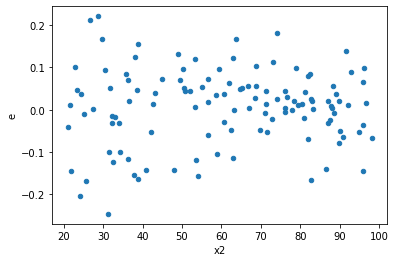

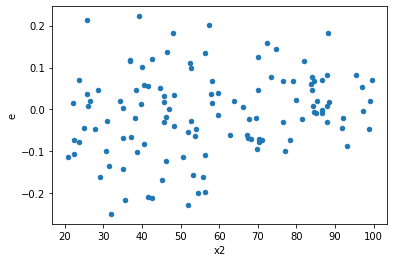

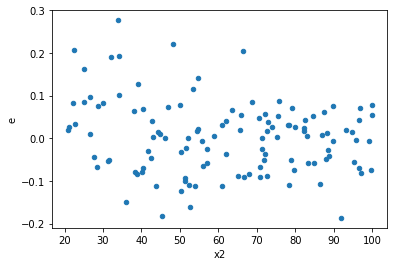

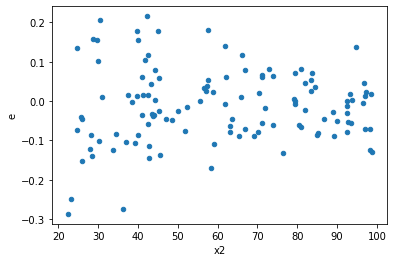

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.796338573540978,0.2469934425306155,0.017696412745355068,0.005488743167347011,0.31016134435424997,0.00014369604355930733,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,0.49358595039161446,0.3299347909433388,0.010968576675369211,0.007331884243185306,0.668444453659117,0.180544853423751,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,0.5399377655973188,0.30487119511456173,0.01199861701327375,0.006774915446990261,0.5646413615415304,0.05825224779561964,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,0.8536119433782745,0.27221030728675716,0.01896915429729499,0.006049117939705715,0.3188923367326039,0.0002024278145441396,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,0.7830447585898026,0.23399800073793517,0.017400994635328945,0.005199955571954115,0.2988309393186487,8.995229008297119e-05,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,0.9543267974932325,0.20052533924684302,0.021207262166516277,0.0044561186499298445,0.2101222974913528,6.624510131205488e-07,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,0.5427487476948762,0.20214696029643353,0.012061083282108361,0.004492154673254078,0.37245034862812243,0.0012327921257459962,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,0.5632297198663591,0.2145055254984777,0.012516215997030202,0.004766789455521727,0.3808490886265283,0.0015730968016653424,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.42250663114989706,0.16096587759559472,0.009389036247775491,0.0035770195021243272,0.3809783462037243,0.0015788935898246783,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    847
Reject001=1 : Homoscedasticity      153
Name: Result_test, dtype: int64